In [1]:
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import os, shutil
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
from keras import applications

> `Topic`
## <font color='white'> Creating Covnet for Small DataSet of MultiClass Flower Classification Problem

### Create Required Directories

In [2]:
original_dataset_dir = 'drive/MyDrive/flowers'

# New Directory to Store Train/Test/Validation Splits
base_dir = 'drive/MyDrive/flowers2'
#os.mkdir(base_dir)

# Directories for our main training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training daisy pictures
train_daisy_dir = os.path.join(train_dir, 'daisy')
#os.mkdir(train_daisy_dir)
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
#os.mkdir(train_dandelion_dir)
# Directory with our training rose pictures
train_rose_dir = os.path.join(train_dir, 'rose')
#os.mkdir(train_rose_dir)
# Directory with our training sunflower pictures
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
#os.mkdir(train_sunflower_dir)
# Directory with our training tulip pictures
train_tulip_dir = os.path.join(train_dir, 'tulip')
#os.mkdir(train_tulip_dir)


# Directory with our validation daisy pictures
validation_daisy_dir = os.path.join(validation_dir, 'daisy')
#os.mkdir(validation_daisy_dir)
# Directory with our validation dandelion pictures
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
#os.mkdir(validation_dandelion_dir)
# Directory with our validation rose pictures
validation_rose_dir = os.path.join(validation_dir, 'rose')
#os.mkdir(validation_rose_dir)
# Directory with our validation sunflower pictures
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
#os.mkdir(validation_sunflower_dir)
# Directory with our validation tulip pictures
validation_tulip_dir = os.path.join(validation_dir, 'tulip')
#os.mkdir(validation_tulip_dir)


# Directory with our test daisy pictures
test_daisy_dir = os.path.join(test_dir, 'daisy')
#os.mkdir(test_daisy_dir)
# Directory with our test dandelion pictures
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
#os.mkdir(test_dandelion_dir)
# Directory with our test rose pictures
test_rose_dir = os.path.join(test_dir, 'rose')
#os.mkdir(test_rose_dir)
# Directory with our test sunflower pictures
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
#os.mkdir(test_sunflower_dir)
# Directory with our test tulip pictures
test_tulip_dir = os.path.join(test_dir, 'tulip')
#os.mkdir(test_tulip_dir)

### Calculate count of Pictures in each category and set train/test/valdation ratio

In [ ]:
# Train, Test, Validation Ratio
train_r = 0.6
test_r = 0.2
validation_r = 0.2

c_daisy = len(os.listdir(original_dataset_dir+'/daisy'))
c_dandelion = len(os.listdir(original_dataset_dir+'/dandelion'))
c_rose = len(os.listdir(original_dataset_dir+'/rose'))
c_sunflower = len(os.listdir(original_dataset_dir+'/sunflower'))
c_tulip = len(os.listdir(original_dataset_dir+'/tulip'))

c_daisy_train = round(c_daisy * train_r)
c_daisy_test = round(c_daisy * test_r)
c_daisy_val = round(c_daisy * validation_r)

c_dandelion_train = round(c_dandelion * train_r)+1
c_dandelion_test = round(c_dandelion * test_r)
c_dandelion_val = round(c_dandelion * validation_r)

c_rose_train = round(c_rose * train_r)
c_rose_test = round(c_rose * test_r)
c_rose_val = round(c_rose * validation_r)

c_sunflower_train = round(c_sunflower * train_r)
c_sunflower_test = round(c_sunflower * test_r)
c_sunflower_val = round(c_sunflower * validation_r)

c_tulip_train = round(c_tulip * train_r)
c_tulip_test = round(c_tulip * test_r)
c_tulip_val = round(c_tulip * validation_r)

### Copy files from source to Destination directories

In [ ]:
# # Diasy Files Copy
# l_daisy = os.listdir(original_dataset_dir+'/daisy')

# for i in l_daisy[0:c_daisy_train]:
#   src = os.path.join(original_dataset_dir,'daisy', i)
#   dst = os.path.join(train_dir,'daisy', i)
#   shutil.copyfile(src, dst)

# for i in l_daisy[c_daisy_train : c_daisy_train + c_daisy_test]:
#   src = os.path.join(original_dataset_dir,'daisy', i)
#   dst = os.path.join(test_dir,'daisy', i)
#   shutil.copyfile(src, dst)

# for i in l_daisy[c_daisy_train + c_daisy_test : c_daisy_train + c_daisy_test + c_daisy_val]:
#   src = os.path.join(original_dataset_dir,'daisy', i)
#   dst = os.path.join(validation_dir,'daisy', i)
#   shutil.copyfile(src, dst)


# # Dandelion Files Copy
# l_dandelion = os.listdir(original_dataset_dir+'/dandelion')

# for i in l_dandelion[0:c_dandelion_train]:
#   src = os.path.join(original_dataset_dir,'dandelion', i)
#   dst = os.path.join(train_dir,'dandelion', i)
#   shutil.copyfile(src, dst)

# for i in l_dandelion[c_dandelion_train : c_dandelion_train + c_dandelion_test]:
#   src = os.path.join(original_dataset_dir,'dandelion', i)
#   dst = os.path.join(test_dir,'dandelion', i)
#   shutil.copyfile(src, dst)

# for i in l_dandelion[c_dandelion_train + c_dandelion_test : c_dandelion_train + c_dandelion_test + c_dandelion_val]:
#   src = os.path.join(original_dataset_dir,'dandelion', i)
#   dst = os.path.join(validation_dir,'dandelion', i)
#   shutil.copyfile(src, dst)


# # Rose Files Copy
# l_rose = os.listdir(original_dataset_dir+'/rose')

# for i in l_rose[0:c_rose_train]:
#   src = os.path.join(original_dataset_dir,'rose', i)
#   dst = os.path.join(train_dir,'rose', i)
#   shutil.copyfile(src, dst)

# for i in l_rose[c_rose_train : c_rose_train + c_rose_test]:
#   src = os.path.join(original_dataset_dir,'rose', i)
#   dst = os.path.join(test_dir,'rose', i)
#   shutil.copyfile(src, dst)

# for i in l_rose[c_rose_train + c_rose_test : c_rose_train + c_rose_test + c_rose_val]:
#   src = os.path.join(original_dataset_dir,'rose', i)
#   dst = os.path.join(validation_dir,'rose', i)
#   shutil.copyfile(src, dst)


# # Sunflower Files Copy
# l_sunflower = os.listdir(original_dataset_dir+'/sunflower')

# for i in l_sunflower[0:c_sunflower_train]:
#   src = os.path.join(original_dataset_dir,'sunflower', i)
#   dst = os.path.join(train_dir,'sunflower', i)
#   shutil.copyfile(src, dst)

# for i in l_sunflower[c_sunflower_train : c_sunflower_train + c_sunflower_test]:
#   src = os.path.join(original_dataset_dir,'sunflower', i)
#   dst = os.path.join(test_dir,'sunflower', i)
#   shutil.copyfile(src, dst)

# for i in l_sunflower[c_sunflower_train + c_sunflower_test : c_sunflower_train + c_sunflower_test + c_sunflower_val]:
#   src = os.path.join(original_dataset_dir,'sunflower', i)
#   dst = os.path.join(validation_dir,'sunflower', i)
#   shutil.copyfile(src, dst)



# # Tulip Files Copy
# l_tulip = os.listdir(original_dataset_dir+'/tulip')

# for i in l_tulip[0:c_tulip_train]:
#   src = os.path.join(original_dataset_dir,'tulip', i)
#   dst = os.path.join(train_dir,'tulip', i)
#   shutil.copyfile(src, dst)

# for i in l_tulip[c_tulip_train : c_tulip_train + c_tulip_test]:
#   src = os.path.join(original_dataset_dir,'tulip', i)
#   dst = os.path.join(test_dir,'tulip', i)
#   shutil.copyfile(src, dst)

# for i in l_tulip[c_tulip_train + c_tulip_test : c_tulip_train + c_tulip_test + c_tulip_val]:
#   src = os.path.join(original_dataset_dir,'tulip', i)
#   dst = os.path.join(validation_dir,'tulip', i)
#   shutil.copyfile(src, dst)

### Check if count of files copied for each category are correct

In [ ]:
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(test_dir+'/daisy')) + len(os.listdir(validation_dir+'/daisy')))
print(len(os.listdir(train_dir+'/dandelion')) + len(os.listdir(test_dir+'/dandelion')) + len(os.listdir(validation_dir+'/dandelion')))
print(len(os.listdir(train_dir+'/rose')) + len(os.listdir(test_dir+'/rose')) + len(os.listdir(validation_dir+'/rose')))
print(len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(test_dir+'/sunflower')) + len(os.listdir(validation_dir+'/sunflower')))
print(len(os.listdir(train_dir+'/tulip')) + len(os.listdir(test_dir+'/tulip')) + len(os.listdir(validation_dir+'/tulip')))

769
1052
784
734
984


### Data Preprocessing

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


### Build Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Run Model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/30
50/50 [==============================] - 49s 971ms/step - loss: 1.5690 - acc: 0.2851 - val_loss: 1.3765 - val_acc: 0.3920
Epoch 2/30
50/50 [==============================] - 49s 973ms/step - loss: 1.3135 - acc: 0.4202 - val_loss: 1.2714 - val_acc: 0.4500
Epoch 3/30
50/50 [==============================] - 48s 970ms/step - loss: 1.2217 - acc: 0.4573 - val_loss: 1.1755 - val_acc: 0.5020
Epoch 4/30
50/50 [==============================] - 49s 972ms/step - loss: 1.1648 - acc: 0.5206 - val_loss: 1.1466 - val_acc: 0.5340
Epoch 5/30
50/50 [==============================] - 49s 977ms/step - loss: 1.1257 - acc: 0.5361 - val_loss: 1.1046 - val_acc: 0.5420
Epoch 6/30
50/50 [==============================] - 49s 972ms/step - loss: 1.0610 - acc: 0.5130 - val_loss: 1.0417 - val_acc: 0.5880
Epoch 7/30
50/50 [==============================] - 49s 976ms/step - loss: 1.1073 - acc: 0.5318 - val_loss: 1.0302 - val_acc: 0.5960
Epoch 8/30
50/50 [==============================] - 48s 970ms/step - 

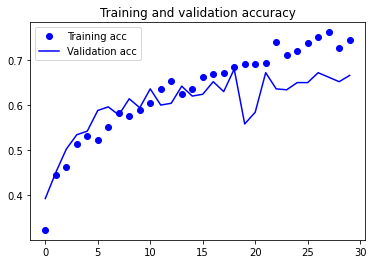

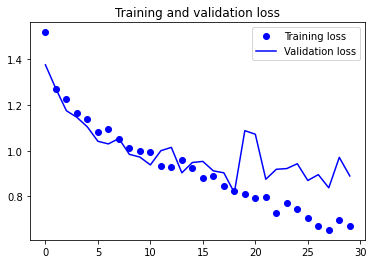

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> `Topic`
## <font color='white'> Use Data Augmentation to improve Accuracy and Overfitting

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/100
50/50 [==============================] - 807s 16s/step - loss: 1.5677 - acc: 0.2597 - val_loss: 1.3289 - val_acc: 0.4650
Epoch 2/100
50/50 [==============================] - 227s 5s/step - loss: 1.3166 - acc: 0.4344 - val_loss: 1.1827 - val_acc: 0.5000
Epoch 3/100
50/50 [==============================] - 122s 2s/step - loss: 1.2659 - acc: 0.4324 - val_loss: 1.1363 - val_acc: 0.5188
Epoch 4/100
50/50 [==============================] - 98s 2s/step - loss: 1.2414 - acc: 0.4707 - val_loss: 1.0918 - val_acc: 0.5638
Epoch 5/100
50/50 [==============================] - 94s 2s/step - loss: 1.2049 - acc: 0.4876 - val_loss: 1.1076 - val_acc: 0.5275
Epoch 6/100
50/50 [==============================] - 95s 2s/step - loss: 1.1526 - acc: 0.5278 - val_loss: 1.1453 - val_acc: 0.5437
Epoch 7/100
50/50 [==============================] - 94s 2s/step - loss: 1.1653 - acc: 0.5050 - val_loss: 1.0238 - val_acc: 0.6000
Epoch 8/100
50/50 [==============================] - 93s 2s/step - loss: 1.1118

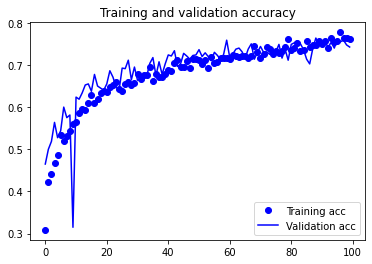

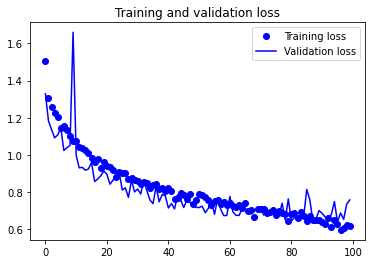

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

>`Topic`
## <font color='white'> Using PreTrained Covnet or Transfer Learning

###### <font color='green'> Load and setup PreTranined CovNet

In [3]:
conv_base = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

###### <font color='green'> a) Using Fast Feature Extraction withOUT Data Augmentation

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
# Extract Features and Labels from PreTrained Covnet
# features matrix size comes from last layer of conv_base i.e. block5_pool (MaxPooling2D) which has output shape of 4,4,512

def extract_features(directory, sample_count,lab):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,lab))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='categorical')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [ ]:
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(train_dir+'/dandelion')) +  len(os.listdir(train_dir+'/rose')) + len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(train_dir+'/tulip')))
print(len(os.listdir(test_dir+'/daisy')) + len(os.listdir(test_dir+'/dandelion')) +  len(os.listdir(test_dir+'/rose')) + len(os.listdir(test_dir+'/sunflower')) + len(os.listdir(test_dir+'/tulip')))
print(len(os.listdir(validation_dir+'/daisy')) + len(os.listdir(validation_dir+'/dandelion')) +  len(os.listdir(validation_dir+'/rose')) + len(os.listdir(validation_dir+'/sunflower')) + len(os.listdir(validation_dir+'/tulip')))

2593
865
865


In [ ]:
train_features, train_labels = extract_features(train_dir, 2593,5)
validation_features, validation_labels = extract_features(validation_dir,865,5)
test_features, test_labels = extract_features(test_dir, 865,5)

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


The extracted features are currently of shape (samples, 4, 4, 512). To feed them to a densely-connected classifier, first we must flatten them to (samples, 8192):

In [ ]:
train_features = np.reshape(train_features, (2593, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (865, 4 * 4 * 512))
test_features = np.reshape(test_features, (865, 4 * 4 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
130/130 [==============================] - 4s 31ms/step - loss: 1.6928 - acc: 0.2846 - val_loss: 1.2104 - val_acc: 0.5815
Epoch 2/30
130/130 [==============================] - 3s 24ms/step - loss: 1.2481 - acc: 0.5084 - val_loss: 1.0229 - val_acc: 0.6682
Epoch 3/30
130/130 [==============================] - 3s 24ms/step - loss: 1.0399 - acc: 0.6146 - val_loss: 0.9098 - val_acc: 0.6786
Epoch 4/30
130/130 [==============================] - 3s 23ms/step - loss: 0.9458 - acc: 0.6532 - val_loss: 0.8477 - val_acc: 0.7156
Epoch 5/30
130/130 [==============================] - 3s 24ms/step - loss: 0.8391 - acc: 0.6935 - val_loss: 0.7992 - val_acc: 0.7040
Epoch 6/30
130/130 [==============================] - 3s 24ms/step - loss: 0.7704 - acc: 0.7309 - val_loss: 0.7780 - val_acc: 0.7179
Epoch 7/30
130/130 [==============================] - 3s 23ms/step - loss: 0.7525 - acc: 0.7333 - val_loss: 0.7462 - val_acc: 0.7156
Epoch 8/30
130/130 [==============================] - 3s 23ms/step - 

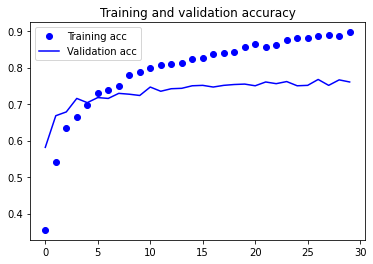

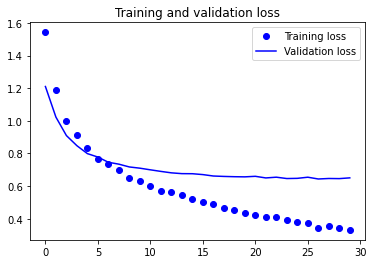

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### <font color='green'> b) Feature Extraction with Data Augmentation (Improve Accuracy and Overfitting of Model)

In [4]:
model = models.Sequential()
model.add(conv_base)  # Adding a densely connected classifier on top of the convolutional base
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 22,123,077
Trainable params: 22,123,077
Non-trainable params: 0
_________________________________________________________________


Freeze conv_base:

Note that in order for these changes to take effect, you must first compile the model. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

In [ ]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 36


In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150*150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/30
50/50 [==============================] - 428s 8s/step - loss: 1.5942 - acc: 0.2562 - val_loss: 1.3803 - val_acc: 0.4540
Epoch 2/30
50/50 [==============================] - 417s 8s/step - loss: 1.3382 - acc: 0.5054 - val_loss: 1.2106 - val_acc: 0.5560
Epoch 3/30
50/50 [==============================] - 414s 8s/step - loss: 1.2263 - acc: 0.5442 - val_loss: 1.1039 - val_acc: 0.6080
Epoch 4/30
50/50 [==============================] - 409s 8s/step - loss: 1.1541 - acc: 0.5728 - val_loss: 1.0796 - val_acc: 0.5980
Epoch 5/30
50/50 [==============================] - 411s 8s/step - loss: 1.0779 - acc: 0.6205 - val_loss: 0.9893 - val_acc: 0.6440
Epoch 6/30
50/50 [==============================] - 409s 8s/step - loss: 0.9845 - acc: 0.6540 - val_loss: 0.9290 - val_acc: 0.6580
Epoch 7/30
50/50 [==============================] - 410s 8s/step - loss: 0.9387 - acc: 0.6625 - val_loss: 0.9189 - val_acc: 0.6520
Epoch 8/30
50/50 [==============================] - 408s 8s/step - loss: 0.9617 - a

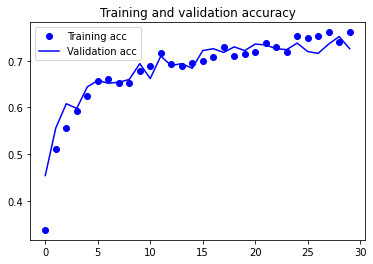

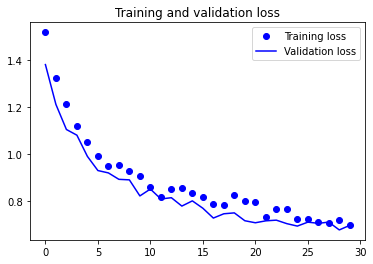

In [ ]:
 acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### <font color='green'> c) Fine Tuning 

 <font color='green'>
**Steps for fine-tuning a PreTrained network** are as follows:(First 3 steps already completed above)

1 Add your custom network on top of an already-trained base network.

2 Freeze the base network.

3 Train the part you added.

4 Unfreeze some layers in the base network.

5 Jointly train both these layers and the part you added.

In [6]:
# We will Fine Tune / un-freeze the last four convolutional layers, which means all layers up to block4_pool should be frozen.
# and the layers block5_conv1, block5_conv2, block5_conv3, block5_conv4 should be trainable

conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [8]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/50
50/50 [==============================] - 721s 15s/step - loss: 1.4732 - acc: 0.3736 - val_loss: 1.2420 - val_acc: 0.5600
Epoch 2/50
50/50 [==============================] - 388s 8s/step - loss: 1.1806 - acc: 0.5560 - val_loss: 0.9790 - val_acc: 0.6540
Epoch 3/50
50/50 [==============================] - 353s 7s/step - loss: 0.9801 - acc: 0.6250 - val_loss: 0.7986 - val_acc: 0.7020
Epoch 4/50
50/50 [==============================] - 354s 7s/step - loss: 0.7902 - acc: 0.6940 - val_loss: 0.7239 - val_acc: 0.7220
Epoch 5/50
50/50 [==============================] - 351s 7s/step - loss: 0.7456 - acc: 0.7321 - val_loss: 0.6733 - val_acc: 0.7380
Epoch 6/50
50/50 [==============================] - 351s 7s/step - loss: 0.6806 - acc: 0.7440 - val_loss: 0.6339 - val_acc: 0.7460
Epoch 7/50
50/50 [==============================] - 348s 7s/step - loss: 0.6507 - acc: 0.7503 - val_loss: 0.6507 - val_acc: 0.7400
Epoch 8/50
50/50 [==============================] - 351s 7s/step - loss: 0.6259 - 

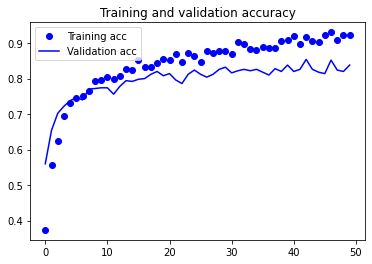

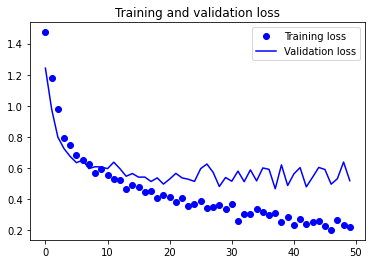

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

>`Topic`
## <font color='white'> Test Model on Test Data

In [15]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 865 images belonging to 5 classes.


In [16]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)

50/50 [==============================] - 366s 7s/step - loss: 0.4637 - acc: 0.8497


In [17]:
print('test acc:', round(test_acc*100,2))

test acc: 84.97
